In [ ]:
#Importando  as Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")


In [ ]:
#Upload do Arquivo
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks (8).xlsx


In [ ]:
#Criando o Dataframe  
df = pd.read_excel("AdventureWorks.xlsx")

In [ ]:
#Visualizando os 5 primeiros 
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [ ]:
#Quantidade de Linhas e Colunas 
df.shape

(904, 16)

In [ ]:
#Verificando o Tipo de Dados 
df.dtypes


Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [ ]:
#Qual Receita Total
df["Valor Venda"].sum()

5984606.1426

In [ ]:
#Qual Custo Total 
df["custo"] = df["Custo Unitário"].mul(df["Quantidade"]) #criando a coluna custo

In [ ]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [ ]:
#Qual o Custo Total 
round(df["custo"].sum(), 2)

2486783.05

In [ ]:
#Agora que Temos a receita e custo e o total , podemos achar o lucro total
#Vamos criar  uma coluna de lucro que sera receita - custo
df["lucro"] = df ["Valor Venda"] - df["custo"]

In [ ]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [ ]:
#Total Lucro
round(df  ["lucro"].sum(), 2)

3497823.09

In [ ]:
#Criando uma Coluna com total de dias   enviar produto
df["Tempo_envio"] = df["Data Envio"] - df["Data Venda"]

In [ ]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


Agora, Quermos saber a media de tempo de envio para cada marca, e para isso prescisamos tranforma a coluna tempo_envio em numerica

In [ ]:
#extraindo apenas dias
df["Tempo_envio"] =  (df["Data Envio"] - df["Data Venda"]).dt.days

In [ ]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [ ]:
#Verificando o Tipo de coluna Tempo_envio
df["Tempo_envio"].dtype


dtype('int64')

In [ ]:
#media do tempo de envio  por marca 
df.groupby("Marca")["Tempo_envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo_envio, dtype: float64

Missing Values


In [ ]:
#Verificando se temos dados faltando 
df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: lucro, dtype: float64

E, Se a gente quiser saber o Lucro por ano  e Por Marca ?

In [ ]:
#Vamos agrupar  por ano e marca 
df.groupby([df["Data Venda"].dt.year,"Marca"])["lucro"].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: lucro, dtype: float64

In [ ]:
pd.options.display.float_format = '{:20, .2f}'.format

In [ ]:
#Resetando o index
lucro_ano = df.groupby([df["Data Venda"].dt.year,"Marca"])["lucro"].sum().reset_index ()



In [ ]:
#Qual Total de Produtos vendidos 
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

Text(0, 0.5, 'Produto')

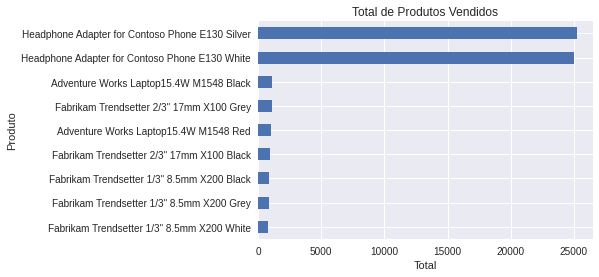

In [ ]:
#Grafico Total de Vendas 
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total de Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto")

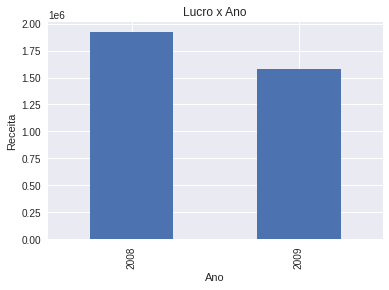

In [ ]:
df.groupby(df["Data Venda"].dt.year)["lucro"].sum().plot.bar(title = "Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Receita");

In [ ]:
#Selecionando apenas Vendas  de 2009
df_2009 = df[df["Data Venda"].dt.year==2009]

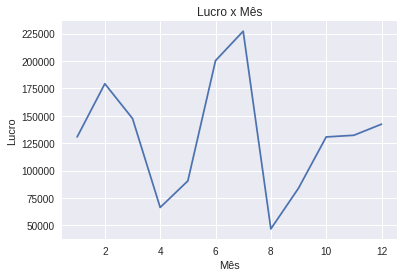

In [ ]:
df_2009.groupby(df_2009["Data Venda"].dt.month)["lucro"].sum().plot(title="Lucro x Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro");

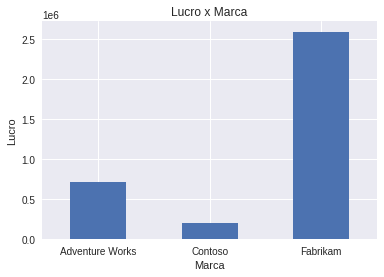

In [ ]:
df.groupby("Marca")["lucro"].sum().plot.bar(title = "Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

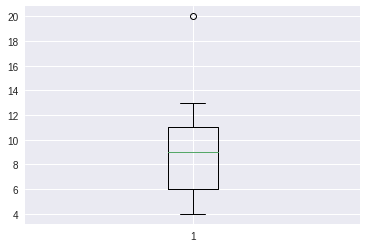

In [ ]:
#Grafico de boxplot
plt.boxplot(df["Tempo_envio"]);

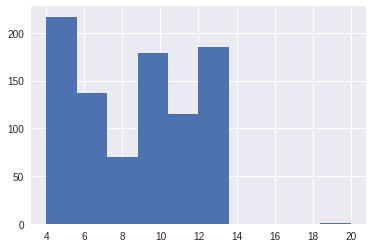

In [ ]:
  #Histograma
  plt.hist(df["Tempo_envio"]);

In [ ]:
#Tempo minimo de envio
df["Tempo_envio"].min() 

4

In [ ]:
#Tempo maximo de envio
df["Tempo_envio"].max() 

20

In [ ]:
#identificando o oullie
df[df["Tempo_envio"] == 20];